# Decision Trees Lab

## Introduction

In this lesson, we'll begin using our decision tree algorithm to make predictions of movie revenue.  To do so, we'll use our IMDB dataset.

### Exploring our data

Let's start by loading our data.

In [3]:
import pandas as pd
movies_df = pd.read_csv('https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/imdb_movies.csv')
movies_df[:5]

,title,genre,budget,runtime,year,month,revenue
0,Avatar,Action,237000000,162.0,2009,12,2787965087
1,Pirates of the Caribbean: At World's End,Adventure,300000000,169.0,2007,5,961000000
2,Spectre,Action,245000000,148.0,2015,10,880674609
3,The Dark Knight Rises,Action,250000000,165.0,2012,7,1084939099
4,John Carter,Action,260000000,132.0,2012,3,284139100


Now let's use  `genre`, `budget`, `runtime`, `year`, and `month` as our features, and `revenue` as our target.  

Assign `genre`, `budget`, `runtime`, `year` and `month` to the variable `X`.

In [4]:
feature_columns = ['genre', 'budget', 'runtime', 'year', 'month']
X = movies_df[feature_columns]

And assign revenue to the variable `y`.

In [5]:
y = movies_df.revenue

In [6]:
y[:2]
# 0    2787965087
# 1     961000000
# Name: revenue, dtype: int64

0    2787965087
1     961000000
Name: revenue, dtype: int64

In [8]:
X[:2]

# genre	budget	runtime	year	month
# 0	Action	237000000	162.0	2009	12
# 1	Adventure	300000000	169.0	2007	5

,genre,budget,runtime,year,month
0,Action,237000000,162.0,2009,12
1,Adventure,300000000,169.0,2007,5


### Changing the data

Now currently the `genre` column is of type `object`. Let's use our LabelEncoder and DataFrameMapper to change it. 

In [24]:
# X['genre'].value_counts()

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    (['genre'], [SimpleImputer(strategy = 'constant', fill_value = 'na'), LabelEncoder()])
], df_out = True, input_df = True)

transformed_genre = mapper.fit_transform(X)

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now if we want to see what genres were turned into what numbers we can do so with by selecting the labelencoder from our mapper, and then checking the `classes_` attribute.  Let's do it.  Begin by looking at the features of the model.

In [69]:
mapper.features

[(['genre'],
  [SimpleImputer(add_indicator=False, copy=True, fill_value='na',
                 missing_values=nan, strategy='constant', verbose=0),
   LabelEncoder()])]

Now select the label encoder from the features.

In [70]:
encoder = mapper.features[-1][-1][-1]
encoder
# LabelEncoder()

LabelEncoder()

Finally, look at the encoder's classes.

In [71]:
encoder.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Thriller',
       'na'], dtype=object)

We can then zip them together with a list of indices to create a dictionary telling us how to translate the column.

In [72]:
import numpy as np
idcs = np.arange(0, len(encoder.classes_))
dict(zip(idcs, encoder.classes_))

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Comedy',
 4: 'Crime',
 5: 'Drama',
 6: 'Fantasy',
 7: 'Horror',
 8: 'Romance',
 9: 'Science Fiction',
 10: 'Thriller',
 11: 'na'}

### Training the Model

Ok, now let's load up a `DecisionTreeRegressor`.  

We use a DecisionTreeRegressor (as opposed to a DecisionTreeClassifier) because the revenue data is not just a $1$ or $0$, but potentially any value greater than 0.  So we have a regression problem.

In [73]:
from sklearn.tree import DecisionTreeRegressor

Now follow the steps training a model.  Initialize our `DecisionTreeRegressor` and then fit the model.

In [74]:
model = DecisionTreeRegressor()

In [75]:
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

And finally, we can make a prediction, by passing through the features of an observation.

In [76]:
observation = X[:1]

model.predict(observation)

array([2.78796509e+09])

We can also see the hypothesis function for our model.

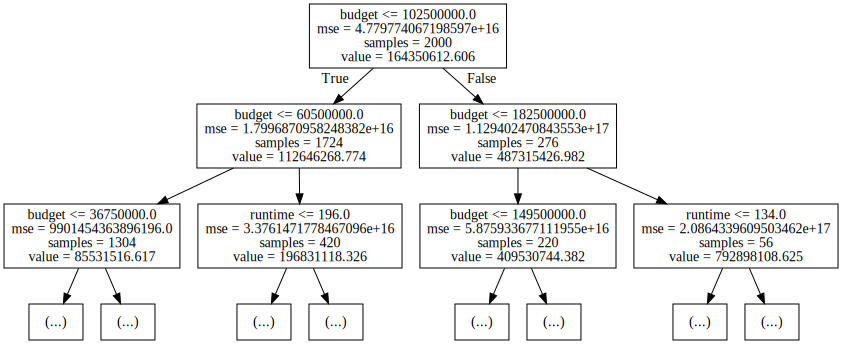

In [77]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))

Let's interpret diagram above.  The `value` on the first node at the top, is the average revenue for all movies - `164350612` (at the bottom of the node).  The best split point for all of the data is the budget.  And then at the next level, we again split by the budget.

In the third level, we see runtime show up as feature.  

The decision tree continues beyond the image, but we only printed out three levels.  A complete mapping of the numbers to genres is provided below.  

### Summary

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>